In [35]:
from google.colab import files
import pandas as pd
import numpy as np
data_set = pd.read_csv('/content/drive/MyDrive/Wuzzuf_Jobs.csv')

In [2]:
data_set

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"
...,...,...,...,...,...,...,...,...
4375,Corporate Sales Executive - Hotel Supplies,Term,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"Corporate Sales, Sales Target, English, Comput..."
4376,Logistics Operations & Warehouse Supervisor,DHL Express Egypt,Abu Rawash,Full Time,Manager,6+ Yrs of Exp,Giza,"Warehousing, Supply Chain Management, Customs ..."
4377,English Teacher ( Second Language ) / Lower...,Modern American School of Egypt 2000,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"English Teacher, Lower Primar, Education, Teac..."
4378,Project Manager - Cairo,KnowledgeNet,Nasr City,Full Time,Manager,5+ Yrs of Exp,Cairo,"Implementation, Project Management, Informatio..."


In [20]:
data_set.describe()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
count,4380,4380,4380,4380,4380,4380,4380,4380
unique,2965,1534,162,6,9,101,42,4227
top,Accountant,Confidential,Cairo,Full Time,Experienced,1-3 Yrs of Exp,Cairo,"Corporate Sales, Real Estate, Advertising, Mar..."
freq,57,590,563,4168,2198,414,2230,12


In [6]:
data_set.shape


(4380, 8)

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     4380 non-null   object
 1   Company   4380 non-null   object
 2   Location  4380 non-null   object
 3   Type      4380 non-null   object
 4   Level     4380 non-null   object
 5   YearsExp  4380 non-null   object
 6   Country   4380 non-null   object
 7   Skills    4380 non-null   object
dtypes: object(8)
memory usage: 273.9+ KB


In [10]:
data_set.duplicated().sum()

np.int64(3)

In [16]:
for col in ['Type', 'Level', 'Location', 'YearsExp', 'Country']:
    print(f"\n{col} - Unique Values:")
    print(data_set[col].value_counts())


Type - Unique Values:
Type
Full Time              4168
Internship               80
Part Time                70
Freelance / Project      44
Work From Home           11
Shift Based               7
Name: count, dtype: int64

Level - Unique Values:
Level
Experienced            2198
Entry Level            1139
Manager                 737
Work From Home          102
Part Time                74
Shift Based              47
Senior Management        37
Freelance / Project      32
Student                  14
Name: count, dtype: int64

Location - Unique Values:
Location
Cairo             563
Maadi             525
New Cairo         522
Nasr City         424
6th of October    282
                 ... 
15th May City       1
Colombo             1
Hisar               1
Allabban            1
Manama              1
Name: count, Length: 162, dtype: int64

YearsExp - Unique Values:
YearsExp
1-3 Yrs of Exp     414
3-5 Yrs of Exp     390
3+ Yrs of Exp      309
2+ Yrs of Exp      259
5+ Yrs of Exp      238
  

In [17]:
data_set['YearsExp'].str.extract(r'(\d+)')

,0
0,1
1,5
2,0
3,3
4,3
...,...
4375,3
4376,6
4377,3
4378,5


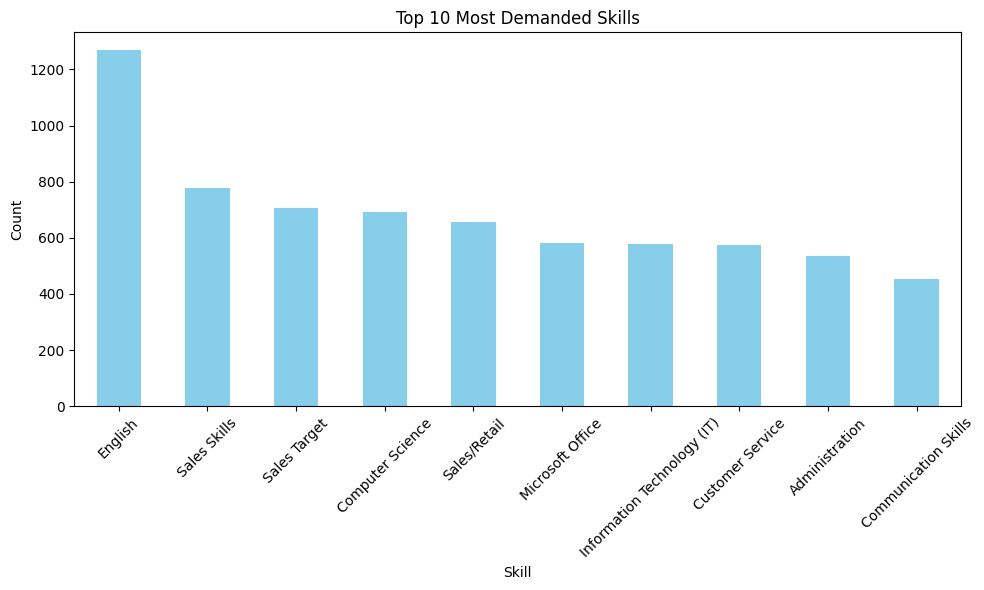

In [27]:
import matplotlib.pyplot as plt

skills_series = data_set['Skills'].dropna().str.split(',')
f_skills = []
for skills in skills_series:
    for skill in skills:
        f_skills.append(skill.strip())
skills_counts = pd.Series(f_skills).value_counts().head(10)
plt.figure(figsize=(10,6))
skills_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Demanded Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
data_set_skills = data_set[['Level', 'Skills']].dropna()


data_set_skills['Skills'] = data_set_skills['Skills'].str.split(',')

data_set_skills = data_set_skills.explode('Skills')

data_set_skills['Skills'] = data_set_skills['Skills'].str.strip()

top_skills_by_level = (
    data_set_skills.groupby('Level')['Skills']
    .value_counts()
    .groupby(level=0)
    .head(5)
)
print(top_skills_by_level)


Level                Skills                     
Entry Level          English                        410
                     Sales Skills                   336
                     Customer Service               276
                     Sales Target                   276
                     Sales/Retail                   235
Experienced          English                        618
                     Computer Science               440
                     Information Technology (IT)    366
                     Microsoft Office               282
                     Sales Skills                   277
Freelance / Project  2 Vacancies                      9
                     English                          8
                     Education                        7
                     Information Technology (IT)      7
                     Adobe Photoshop                  5
Manager              English                        157
                     Operations/Management          154

In [29]:
top_skills_by_level.unstack().fillna('-')

Skills,English,Sales Skills,Customer Service,Sales Target,Sales/Retail,Computer Science,Information Technology (IT),Microsoft Office,2 Vacancies,Education,...,Medical,Medical/Healthcare,MoHP,Customer Care,Customer Support,Call Center,Business Development,Digital Marketing,IT/Software Development,Software Development
Level,,,,,,,,,,,,,,,,,,,,,
Entry Level,410.0,336.0,276.0,276.0,235.0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Experienced,618.0,277.0,-,-,-,440.0,366.0,282.0,-,-,...,-,-,-,-,-,-,-,-,-,-
Freelance / Project,8.0,-,-,-,-,-,7.0,-,9.0,7.0,...,-,-,-,-,-,-,-,-,-,-
Manager,157.0,116.0,-,-,126.0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Part Time,20.0,-,-,12.0,-,16.0,18.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Senior Management,-,-,-,-,-,-,-,-,-,-,...,9.0,9.0,9.0,-,-,-,-,-,-,-
Shift Based,17.0,-,25.0,-,-,-,-,-,-,-,...,-,-,-,19.0,15.0,12.0,-,-,-,-
Student,3.0,-,-,-,-,4.0,-,-,-,-,...,-,-,-,-,-,-,3.0,3.0,3.0,-
Work From Home,33.0,-,-,-,-,27.0,29.0,-,-,-,...,-,-,-,-,-,-,-,-,-,22.0


In [32]:
data_set['MinYearsExp'] = data_set['YearsExp'].str.extract(r'(\d+)').astype(float)
skills_table = data_set[['Title', 'Company', 'Level', 'Skills']].dropna().copy()
skills_table['Skills'] = skills_table['Skills'].str.split(',')
skills_table = skills_table.explode('Skills')
skills_table['Skills'] = skills_table['Skills'].str.strip()
skills_table.reset_index(drop=True, inplace=True)
skills_table['JobID'] = skills_table.index + 1

In [36]:

data_set.to_csv('jobs_main.csv', index=False)
skills_table.to_csv('job_skills.csv', index=False)
files.download('jobs_main.csv')
files.download('job_skills.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

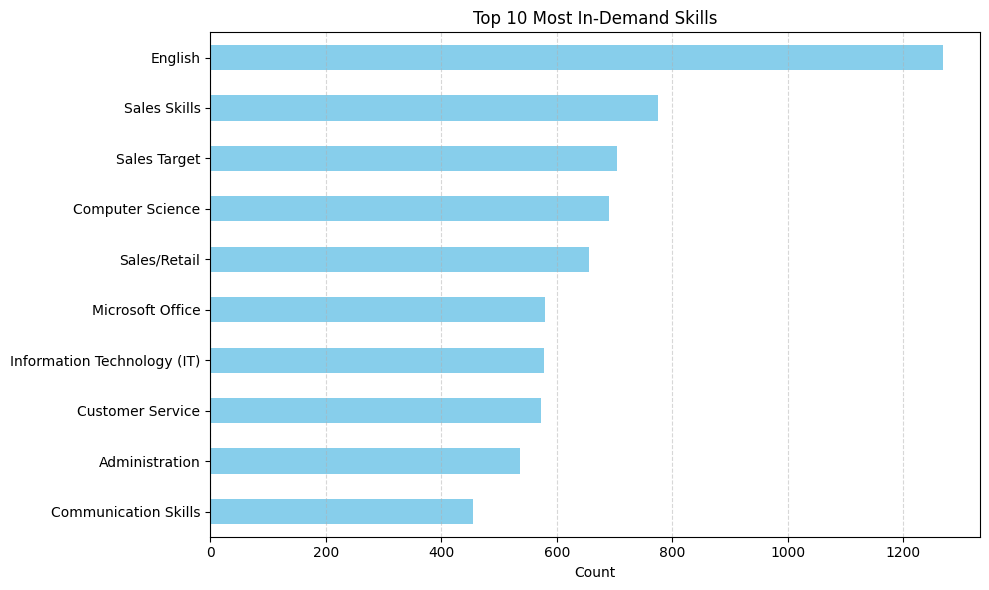

In [39]:
import seaborn as sns
data_set['MinYearsExp'] = data_set['YearsExp'].str.extract(r'(\d+)').astype(float)

flat_skills = skills_table['Skills'].dropna().str.strip().tolist()

skills_counts = pd.Series(flat_skills).value_counts().head(10)
plt.figure(figsize=(10,6))
skills_counts.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

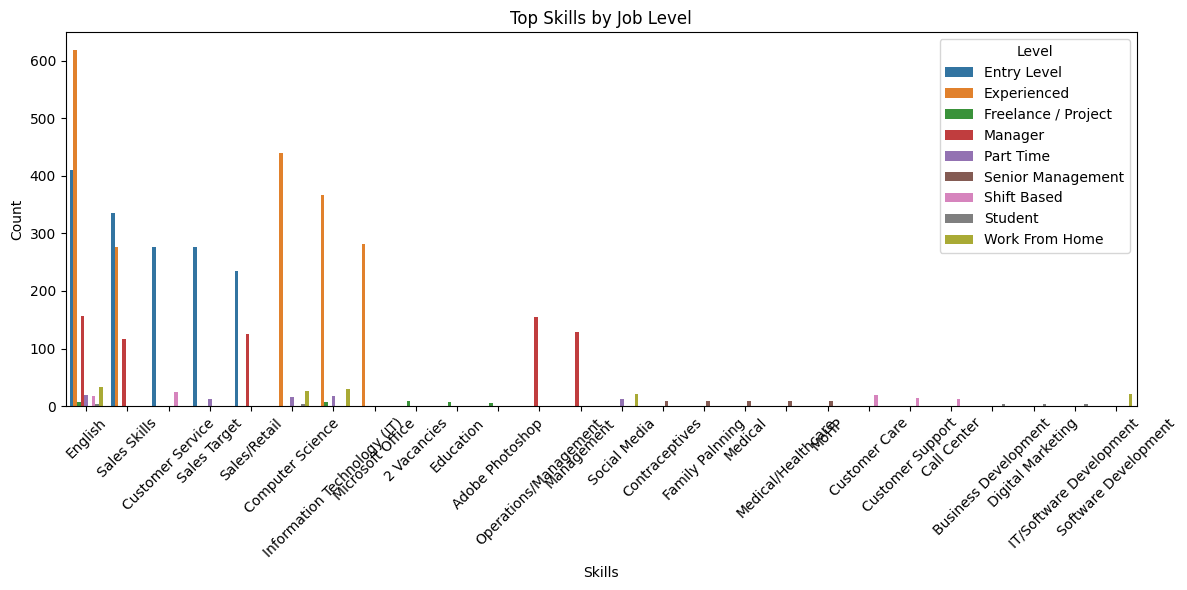

In [40]:
skills_by_level = skills_table.groupby(['Level', 'Skills']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
top_skills = skills_by_level.groupby('Level').apply(lambda d: d.nlargest(5, 'Count')).reset_index(drop=True)
sns.barplot(data=top_skills, x='Skills', y='Count', hue='Level')
plt.title('Top Skills by Job Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

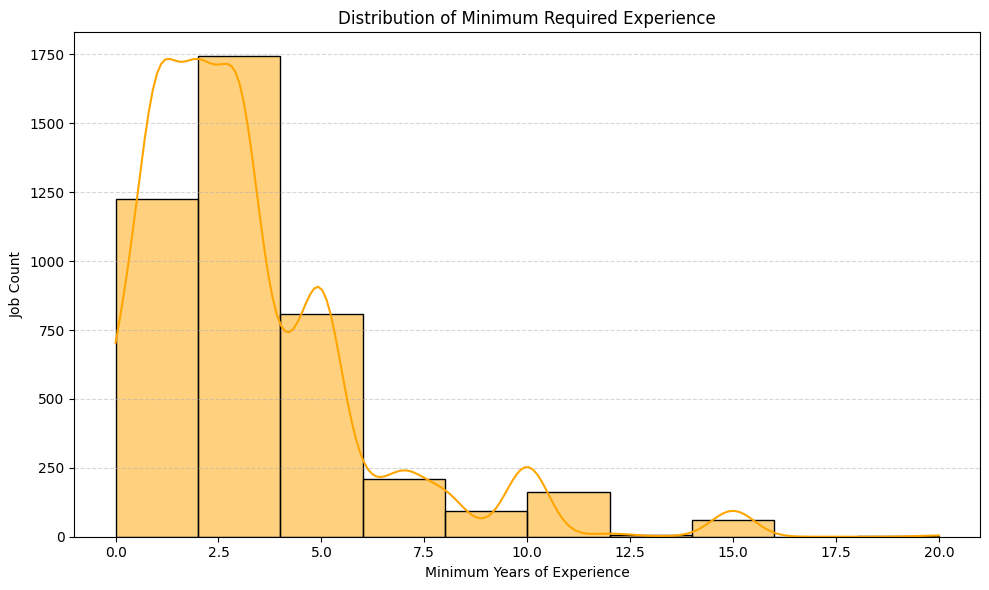

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data_set['MinYearsExp'].dropna(), bins=10, kde=True, color='orange')
plt.title('Distribution of Minimum Required Experience')
plt.xlabel('Minimum Years of Experience')
plt.ylabel('Job Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

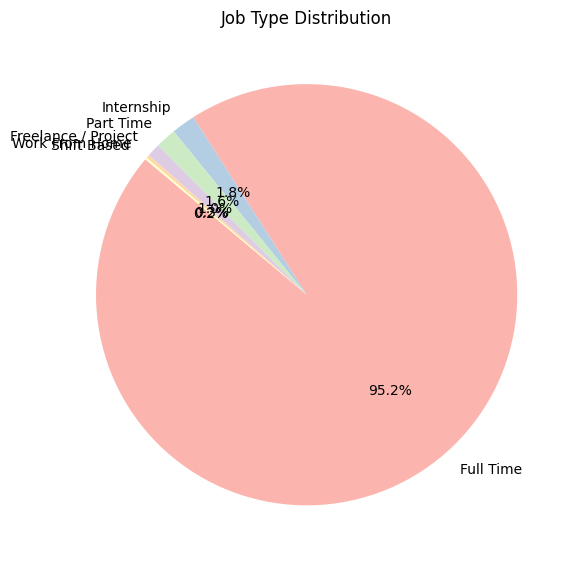

In [42]:
type_counts = data_set['Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Job Type Distribution')
plt.tight_layout()
plt.show()

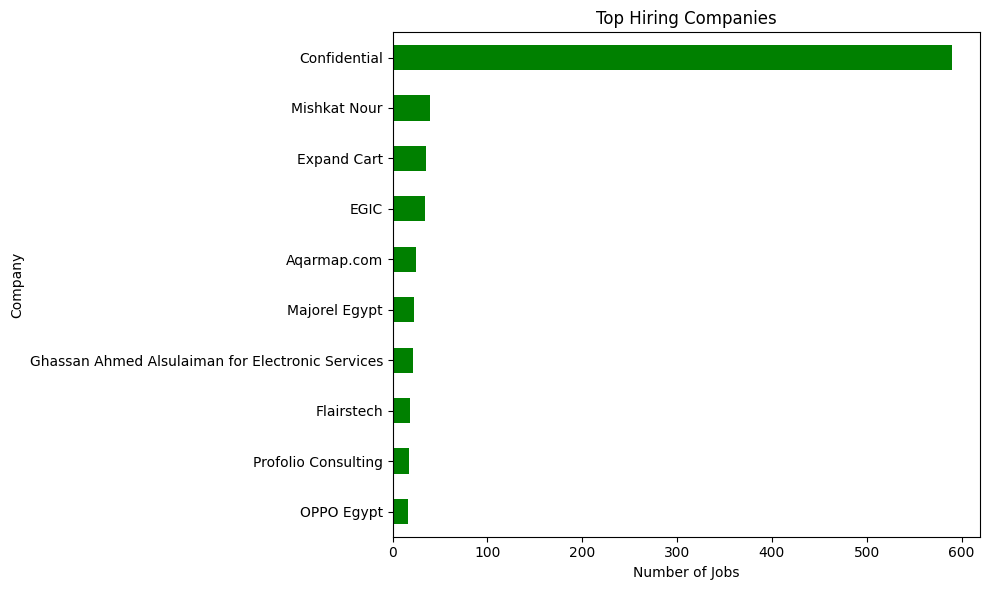

In [43]:
top_companies = data_set['Company'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_companies.plot(kind='barh', color='green')
plt.title('Top Hiring Companies')
plt.xlabel('Number of Jobs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()